<a href="https://colab.research.google.com/github/fahmi54321/nlp_spam-detection/blob/main/Nlp_Spam_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, f1_score, confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from wordcloud import WordCloud

In [ ]:
# data from:
# https://www.kaggle.com/uciml/sms-spam-collection-dataset
!wget https://lazyprogrammer.me/course_files/spam.csv

--2024-06-29 13:44:37--  https://lazyprogrammer.me/course_files/spam.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 104.21.23.210, 172.67.213.166, 2606:4700:3030::ac43:d5a6, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|104.21.23.210|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 503663 (492K) [text/csv]
Saving to: ‘spam.csv’

spam.csv            100%[===================>] 491.86K  --.-KB/s    in 0.07s   

2024-06-29 13:44:37 (7.26 MB/s) - ‘spam.csv’ saved [503663/503663]



In [ ]:
# file contains some invalid chars
# depending on which version of pandas you have
# an error may be thrown
# encoding='ISO-8859-1' ==> The csv contains some invalid characters. So if you tried to use default encoding, you're going to get an error that
# there's a character that's not valid. Generally, when you're working with text, you're going to come across invalid characters, especially these
# days with the existence of emojis and other non-standard symbols.
df = pd.read_csv('spam.csv', encoding='ISO-8859-1')

In [ ]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
# drop unnecessary columns
df = df.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)

In [ ]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
# rename columns to something better
df.columns = ['labels', 'data']

In [ ]:
df.head()

,labels,data
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


<Axes: >

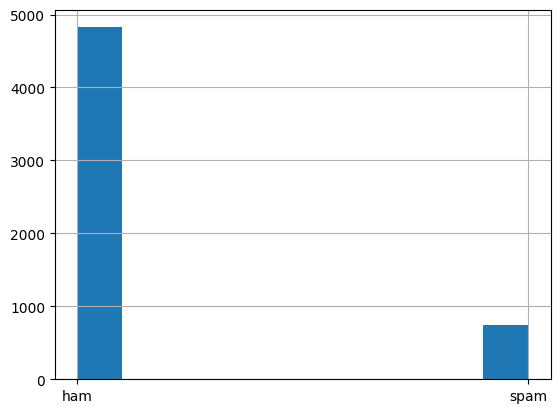

In [ ]:
# draw a histogram of our labels, this will help us determine whether or not we have imbalanced classes
# in particular, Ham is much more common than Spam, so it will make sense to look at other metrics such as the F1 Score in the AUC
df['labels'].hist()

In [ ]:
# create binary labels
# create a new columns called b_labels, which assigns a value of zero to Ham and a value of one to spam.
# we are also going to extract this column as an numpy array
df['b_labels'] = df['labels'].map({'ham': 0, 'spam': 1})
Y = df['b_labels'].to_numpy()

In [ ]:
# split up the data
df_train, df_test, Ytrain, Ytest = train_test_split(
    df['data'], Y, test_size=0.33)

In [ ]:
# create our X matrix which contains the input features for every sample
# decode_error='ignore' ==> if any invalid UTF-8 characters are found, we want to just ignore them

featurizer = CountVectorizer(decode_error='ignore')
Xtrain = featurizer.fit_transform(df_train)
Xtest = featurizer.transform(df_test)

# try multiple ways of calculating features
# featurizer = TfidfVectorizer(decode_error='ignore')
# Xtrain = featurizer.fit_transform(df_train)
# Xtest = featurizer.transform(df_test)

In [ ]:
Xtrain

<3733x7025 sparse matrix of type '<class 'numpy.int64'>'
	with 49457 stored elements in Compressed Sparse Row format>

In [ ]:
# create the model, train it, print scores
model = MultinomialNB()
model.fit(Xtrain, Ytrain)
print("train acc:", model.score(Xtrain, Ytrain))
print("test acc:", model.score(Xtest, Ytest))

train acc: 0.9924993302973479
test acc: 0.9891245241979336


In [ ]:
Ptrain = model.predict(Xtrain)
Ptest = model.predict(Xtest)
print("train F1:", f1_score(Ytrain, Ptrain))
print("test F1:", f1_score(Ytest, Ptest))

train F1: 0.970464135021097
test F1: 0.9618320610687023


In [ ]:
Prob_train = model.predict_proba(Xtrain)[:,1]
Prob_test = model.predict_proba(Xtest)[:,1]
print("train AUC:", roc_auc_score(Ytrain, Prob_train))
print("test AUC:", roc_auc_score(Ytest, Prob_test))

train AUC: 0.9912779972289807
test AUC: 0.9849292115370134


In [ ]:
cm = confusion_matrix(Ytrain, Ptrain)
cm

array([[3245,   12],
       [  16,  460]])

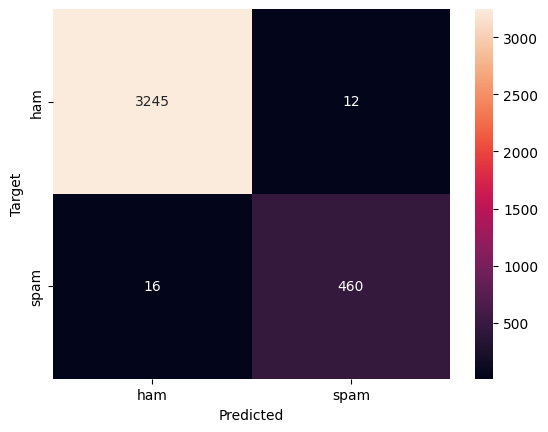

In [ ]:
# Scikit-Learn is transitioning to V1 but it's not available on Colab
# The changes modify how confusion matrices are plotted
def plot_cm(cm):
  classes = ['ham', 'spam']
  df_cm = pd.DataFrame(cm, index=classes, columns=classes)
  ax = sn.heatmap(df_cm, annot=True, fmt='g')
  ax.set_xlabel("Predicted")
  ax.set_ylabel("Target")

plot_cm(cm)

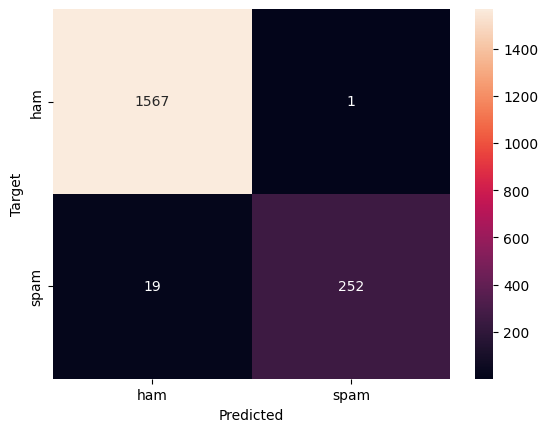

In [ ]:
cm_test = confusion_matrix(Ytest, Ptest)
plot_cm(cm_test)

In [ ]:
# visualize the data
def visualize(label):
  words = ''
  for msg in df[df['labels'] == label]['data']:
    msg = msg.lower()
    words += msg + ' '
  wordcloud = WordCloud(width=600, height=400).generate(words)
  plt.imshow(wordcloud)
  plt.axis('off')
  plt.show()

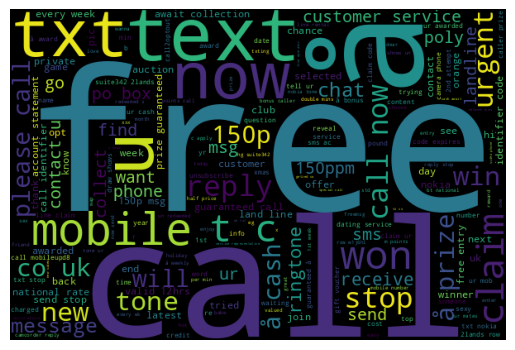

In [ ]:
visualize('spam')

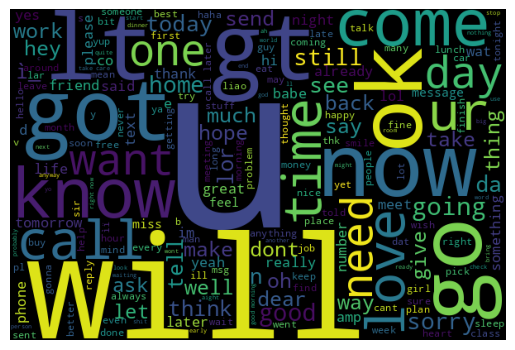

In [ ]:
visualize('ham')

In [ ]:
# see what we're getting wrong
X = featurizer.transform(df['data'])
df['predictions'] = model.predict(X)

In [ ]:
# things that should be spam
sneaky_spam = df[(df['predictions'] == 0) & (df['b_labels'] == 1)]['data']
for msg in sneaky_spam:
  print(msg)

FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, å£1.50 to rcv
Did you hear about the new \Divorce Barbie\"? It comes with all of Ken's stuff!"
Do you realize that in about 40 years, we'll have thousands of old ladies running around with tattoos?
Ever thought about living a good life with a perfect partner? Just txt back NAME and AGE to join the mobile community. (100p/SMS)
Talk sexy!! Make new friends or fall in love in the worlds most discreet text dating service. Just text VIP to 83110 and see who you could meet.
Hello. We need some posh birds and chaps to user trial prods for champneys. Can i put you down? I need your address and dob asap. Ta r
Filthy stories and GIRLS waiting for your
Can U get 2 phone NOW? I wanna chat 2 set up meet Call me NOW on 09096102316 U can cum here 2moro Luv JANE xx Callså£1/minmoremobsEMSPOBox45PO139WA
Hi its LUCY Hubby at meetins all day Fri & I will B alone at hotel 

In [ ]:
# things that should not be spam
# perhaps some are mislabeled?
not_actually_spam = df[(df['predictions'] == 1) & (df['b_labels'] == 0)]['data']
for msg in not_actually_spam:
  print(msg)

No calls..messages..missed calls
No calls..messages..missed calls
Waiting for your call.
Hey...Great deal...Farm tour 9am to 5pm $95/pax, $50 deposit by 16 May
Total video converter free download type this in google search:)
No calls..messages..missed calls
Unlimited texts. Limited minutes.
Mathews or tait or edwards or anderson
Have you laid your airtel line to rest?
I liked the new mobile
Anytime...
I (Career Tel) have added u as a contact on INDYAROCKS.COM to send FREE SMS. To remove from phonebook - sms NO to  &lt;#&gt;
Nokia phone is lovly..
